# Nguyễn Thái Vũ - 1712921

## Các câu hỏi dự kiến sẽ được khám phá 
1. Thống kê số lượng người nhiễm covid19 và số lượng người tử vong trên toàn thế giới.
2. Dự đoán số ca nhiễm bệnh trong 10 ngày tiếp theo trên toàn thế giới.
3. Thống kê tình hình covid19 ở Việt Nam
4. Dự đoán số ca nhiễm trong 10 ngày tiếp theo. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Đọc dữ liệu từ file csv (index_col=0 để loại bỏ những cột Unnamed (số thứ tự trong file csv))
df_confirm = pd.read_csv("time_series_covid_19_confirmed.csv")
df_covid19 = pd.read_csv("cases_country.csv", index_col=0)

# 1. THỐNG KÊ SỐ LƯỢNG NGƯỜI NHIỄM COVID VÀ SỐ LƯỢNG NGƯỜI TỬ VONG TRÊN TOÀN THẾ GIỚI

## 1.1 Xử lý dữ liệu 

In [3]:
# Đổi tên lại các column cho việc thao tác dễ dàng hơn
df_confirm = df_confirm.rename(columns={"Province/State":"state","Country/Region": "country"})
df_death = df_death.rename(columns={"Province/State":"state","Country/Region": "country"})
df_covid19 = df_covid19.rename(columns={"Country_Region": "country"})

- "df_covid19" chứa thông tin về dịch bệnh covid trên mỗi quốc gia (số người tử vong, số người nhiễm bệnh, số người hồi phục...), gồm 188 dòng - tương ứng 188 quốc gia.
- Ta sẽ loại bỏ những thuộc tính (cột) không liên quan đến việc ta phân tích:
    + Ta thấy People_Tested và People_Hospitalized không có giá trị => Loại bỏ
    + ISO3: là mã của quốc gia (alpha code 3)- không có ý nghĩa trong việc phân tích hiện tại => loại bỏ
    + UID: là mã của quốc gia (numeric code)- không có ý nghĩa trong việc phân tích hiện tại => loại bỏ
    + Ta dùng tên quốc gia làm index cho DataFrame

In [4]:
df_covid19 = df_covid19.drop(["People_Tested","People_Hospitalized","UID","ISO3", 'Lat','Long_','Last_Update'],axis =1)
df_covid19.index = df_covid19['country']
df_covid19 = df_covid19.drop(['country'],axis=1)
df_covid19.head()

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate
country,,,,,,
Australia,21713.0,331.0,12391.0,8991.0,85.283801,1.524432
Austria,22106.0,723.0,20010.0,1373.0,245.447682,3.270605
Canada,122053.0,9034.0,108050.0,4970.0,322.416422,7.401703
China,88906.0,4689.0,82247.0,1970.0,6.329287,5.274110
Denmark,15142.0,620.0,13164.0,1358.0,261.420396,4.094571


- Dùng hàm info() của pandas ta thấy có 2 cột dữ liệu ("Recovered" và "Incident_Rate") có dữ liệu bị thiếu. Ta sẽ tìm cách điền vào các dòng bị thiếu.
- "Recovered", có 3 dòng NaN. Đối với cột dữ liệu này, khả năng rất cao là chưa có ca bệnh nào hồi phục. Vì vậy, ta sẽ điều 0 vào các chỗ NaN.
- "Incident_Rate", bản thân em/mình cũng không hiểu tỷ lệ này là gì. cho nên không nhận xét cách điều NaN nào là hợp lý. Nên xin phép không điền vào NaN ở cột này.

In [5]:
df_covid19.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, Australia to Zimbabwe
Data columns (total 6 columns):
Confirmed         188 non-null float64
Deaths            188 non-null float64
Recovered         185 non-null float64
Active            188 non-null float64
Incident_Rate     186 non-null float64
Mortality_Rate    188 non-null float64
dtypes: float64(6)
memory usage: 10.3+ KB


In [6]:
df_covid19["Recovered"] = df_covid19["Recovered"].fillna(0)

## 1.2 Thống kê

- Tính tổng toàn cầu: số lượng người nhiễm (confirm), số lượng người tử vong (death), số lượng người hồi phục (recover) và số lượng người đang điều trị (active).
- Lưu ý: số lượng ca nhiễm toàn cầu sẽ bằng tổng các nước cộng lại (ngoại trừ "Mortality_Rate" - tỷ lệ tử vong) ta không thể tính tổng, mà sẽ tính lại bằng công thức: (tổng số người tử vong) / (tổng số ca nhiễm)
- Về số liệu: số lượng ca nhiễm, số người tử vong, số ca hồi phục, số ca đang điều trị ta hiển thị dạng integer. Đối với tỷ lệ: tỷ suất mắc bệnh-"Incident rate" và tỷ lệ tử vong-"Mortality" ta hiển thị dạng float với 2 ký tự thập phân.

In [7]:
df_global = pd.DataFrame(pd.to_numeric(df_covid19.sum()),dtype=np.float).transpose()
df_global = df_global.drop(['Mortality_Rate'],axis=1)
df_global["Mortality Rate"] = np.round(100*df_global["Deaths"]/df_global["Confirmed"],2)
df_global.style.background_gradient(cmap='Wistia',axis=1).format("{:.2f}").format("{:.0f}",subset=["Confirmed","Deaths","Recovered","Active"])

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality Rate
0,20092855,736254,12350879,6198824,60950.26,3.66


- Tiếp theo, ta sắp xếp thứ tự các quốc gia dựa theo số lượng ca nhiễm bệnh. 
- Đặc biệt , ta biểu diễn bằng hàm background_gradient (quan sát kỹ, ta sẽ thấy những cột: Deaths, Recoveres, Active, Incident_Rate mặc dù không được sắp xếp theo thứ tự, tuy nhiên, giá trị lớn, nhỏ sẽ có màu đậm, nhạt tương ứng)

In [8]:
df_covid19 = df_covid19.sort_values("Confirmed", ascending= False)
df_covid19.style.background_gradient(cmap="Purples",subset=["Confirmed"])\
                        .background_gradient(cmap="Reds",subset=["Deaths"])\
                        .background_gradient(cmap="YlGn",subset=["Recovered"])\
                        .background_gradient(cmap="Oranges",subset=["Active"])\
                        .background_gradient(cmap="RdPu",subset=["Incident_Rate"])\
                        .background_gradient(cmap="Greens",subset=["Mortality_Rate"])\
                        .format("{:.2f}").format("{:.0f}",subset=["Confirmed","Deaths","Recovered","Active"])

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate
country,,,,,,
US,5094565,163465,1670755,2453446,1546.31,3.21
Brazil,3057470,101752,2390830,564888,1438.41,3.33
India,2268675,45257,1583489,639929,164.40,1.99
Russia,890799,14973,695317,180509,610.41,1.68
South Africa,563598,10621,417200,135777,950.28,1.88
Mexico,485836,53003,393160,39673,380.18,10.91
Peru,483133,21276,324020,137837,1465.29,4.40
Colombia,397623,13154,221484,162985,781.45,3.31
Chile,375044,10139,347342,17563,1961.92,2.70


### Bên cạnh đó, từ DataFrame "df_covid19" ta còn có thể rút ra một số thông tin:
- 10 quốc gia có số ca nhiễm Covid19 cao nhất
- 10 quốc gia có số người tử vong cao nhất

<BarContainer object of 10 artists>

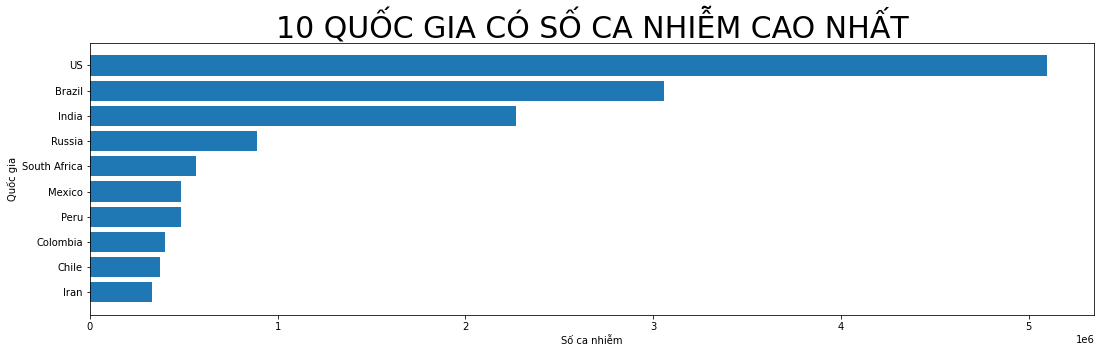

In [35]:
# Vẽ biểu đồ thể hiện 10 quốc gia có số ca nhiễm cao nhất và so sánh với Việt Nam
df_top10_country_confirm = df_covid19.sort_values('Confirmed', ascending= False)[:10]['Confirmed'].astype(np.int)
df_top10_country_confirm

plt.figure(figsize=(18,5))
plt.title("10 QUỐC GIA CÓ SỐ CA NHIỄM CAO NHẤT",fontsize=30)
plt.xlabel("Số ca nhiễm")
plt.ylabel("Quốc gia")
plt.barh(df_top10_country_confirm.index[::-1], df_top10_country_confirm.values[::-1])

<BarContainer object of 10 artists>

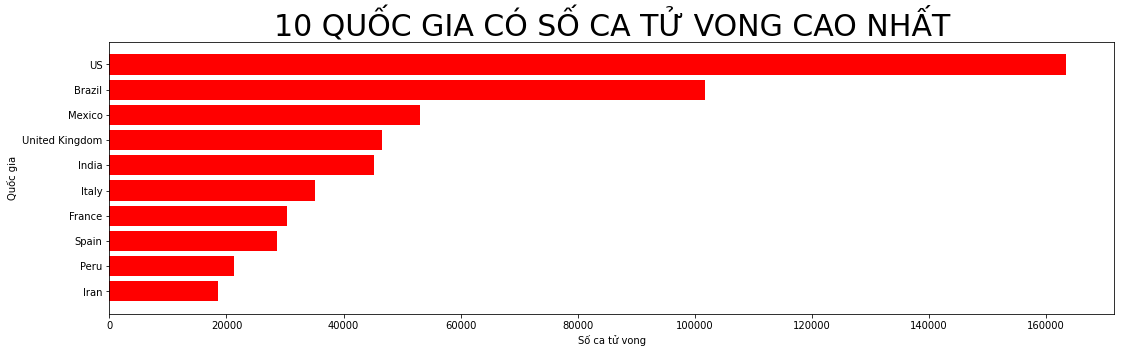

In [37]:
# Vẽ biểu đồ thể hiện 10 quốc gia có số người chết cao nhất và so sánh với Việt Nam
df_top10_country_death = df_covid19.sort_values('Deaths', ascending= False)[:10]['Deaths'].astype(np.int)
df_top10_country_death

plt.figure(figsize=(18,5))
plt.title("10 QUỐC GIA CÓ SỐ CA TỬ VONG CAO NHẤT", fontsize = 30)
plt.xlabel("Số ca tử vong")
plt.ylabel("Quốc gia")
plt.barh(df_top10_country_death.index[::-1], df_top10_country_death.values[::-1], color="red")